<a href="https://colab.research.google.com/github/ARUNAGIRI1617/FLAML/blob/main/Prediction_using_FLAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REQUIREMENTS

In [ ]:
#For using AutoML Library
!pip install flaml[notebook]


DATA FETCHING


In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv",header = None)

In [41]:

df.columns = ["No of times pregnant","Plasma glucose","Diastolic blood pressure","Triceps skin fold thickness","2-Hour serum insulin","bmi","Diabetes pedigree function","Age","Class"]
df.columns

Index(['No of times pregnant', 'Plasma glucose', 'Diastolic blood pressure',
       'Triceps skin fold thickness', '2-Hour serum insulin', 'bmi',
       'Diabetes pedigree function', 'Age', 'Class'],
      dtype='object')

In [ ]:
df.shape

In [43]:
df.head()

,No of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,bmi,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


SPLITING TRAINING AND TESTING DATA



In [44]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

IMPORTING FLAML

In [45]:
from flaml import AutoML
automl = AutoML()

CONFIGURING FLAML

In [46]:
settings = {
"time_budget": 300,  # total runtime in seconds
"metric": 'f1',  # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
"task": 'classification',  # task type  classification or regression
"log_file_name": 'diabetes_experiment.log',  # flaml log file
}

FITTING THE FLAML MODEL

In [47]:
automl.fit(X_train=X_train, y_train=y_train, **settings)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[flaml.automl: 10-12 17:13:11] {1972} INFO -  at 76.2s,	estimator lrl1's best error=0.3209,	best estimator lgbm's best error=0.2166
INFO:flaml.automl: at 76.2s,	estimator lrl1's best error=0.3209,	best estimator lgbm's best error=0.2166
[flaml.automl: 10-12 17:13:11] {1777} INFO - iteration 286, current learner lrl1
INFO:flaml.automl:iteration 286, current learner lrl1
/usr/local/lib/python3.7/dist-packages/s

OUTPUT


In [48]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))



Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 36, 'num_leaves': 4, 'min_child_samples': 6, 'learning_rate': 0.23097920237902753, 'log_max_bin': 10, 'colsample_bytree': 1.0, 'reg_alpha': 0.01030170075872315, 'reg_lambda': 0.005367124495670783}
Best accuracy on validation data: 0.7867
Training duration of best run: 0.1122 s


In [49]:
#To check which is the model selected by FLAML
automl.model

TO SAVE THE MODEL


In [56]:
import pickle
with open('automl.pkl', 'wb') as f:
  pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

In [58]:
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)
y_pred_proba = automl.predict_proba(X_test)[:,1]

Predicted labels [0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0]
True labels 223    0
461    0
175    1
636    0
349    1
      ..
88     1
719    1
371    0
390    0
491    0
Name: Class, Length: 154, dtype: int64


TO CHECK THE PERFORMANCE METRIC

In [59]:
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))
print('f1', '=', 1 - sklearn_metric_loss_score('f1', y_pred, y_test))




accuracy = 0.7727272727272727
roc_auc = 0.8501457725947522
log_loss = 0.4516503656589987
f1 = 0.6391752577319587


In [63]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
get_output_from_log(filename=settings['log_file_name'], time_budget=60)

for config in config_history:
  print(config)



{'Current Learner': 'lgbm', 'Current Sample': 614, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 614, 'Current Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alpha': 0.001348364934537134, 'reg_lambda': 1.4442580148221913}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 12, 'learning_rate': 0.26770501231052046, 'log_max_bin': 7, 'colsample_bytree': 1.0, 'reg_alp

TO CHECK THE LEARNING *CURVE*

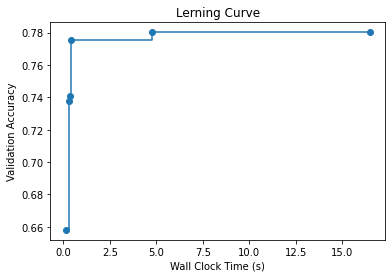

In [64]:
import matplotlib.pyplot as plt
import numpy as np
plt.title('Lerning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.scatter(time_history, 1 - np.array(valid_loss_history))
plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')
plt.show()